# Import dataset

In [4]:

import pandas as pd
df = pd.read_csv('datasets/PhiUSIIL_Phishing_URL_Dataset.csv')

# Display information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235795 entries, 0 to 235794
Data columns (total 56 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   FILENAME                    235795 non-null  object 
 1   URL                         235795 non-null  object 
 2   URLLength                   235795 non-null  int64  
 3   Domain                      235795 non-null  object 
 4   DomainLength                235795 non-null  int64  
 5   IsDomainIP                  235795 non-null  int64  
 6   TLD                         235795 non-null  object 
 7   URLSimilarityIndex          235795 non-null  float64
 8   CharContinuationRate        235795 non-null  float64
 9   TLDLegitimateProb           235795 non-null  float64
 10  URLCharProb                 235795 non-null  float64
 11  TLDLength                   235795 non-null  int64  
 12  NoOfSubDomain               235795 non-null  int64  
 13  HasObfuscation

In [97]:
# Display the first few rows of the dataset
df['ObfuscationRatio'].value_counts()


0.000    235310
0.056        57
0.098        11
0.029        10
0.030         9
          ...  
0.123         1
0.157         1
0.182         1
0.129         1
0.202         1
Name: ObfuscationRatio, Length: 146, dtype: int64

# Data Pre-Processing 

In [14]:
# Checking again for any missing values in the dataset
missing_values_df = df.isnull().sum()

# Filtering the columns that have missing values
missing_columns_df = missing_values_df[missing_values_df > 0]

# Check if there are any missing values and display an appropriate message
# Display a message if there are missing values or not
if missing_columns_df.empty:
    message = "There are no missing values in the dataset."
else:
    message = f"There are missing values in the following columns:\n{missing_columns_df}"

message

'There are no missing values in the dataset.'

In [15]:
# Selecting categorical columns in the dataframe
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

categorical_columns

['FILENAME', 'URL', 'Domain', 'TLD', 'Title']

In [31]:
# Removing other unwanted categorical columns
try:
    df.drop(columns=['FILENAME', 'URL', 'Domain', 'Title', 'URLSimilarityIndex'], inplace=True)
    message = "['FILENAME', 'URL', 'Domain', 'Title'] has been removed from the dataset"
except KeyError as e:
    message = f"Error: {e}"

# Display new columns after removing unwanted ones
message

'Error: "[\'FILENAME\' \'URL\' \'Domain\' \'Title\'] not found in axis"'

In [32]:
df.columns

Index(['URLLength', 'DomainLength', 'IsDomainIP', 'TLD', 'URLSimilarityIndex',
       'CharContinuationRate', 'TLDLegitimateProb', 'URLCharProb', 'TLDLength',
       'NoOfSubDomain', 'HasObfuscation', 'NoOfObfuscatedChar',
       'ObfuscationRatio', 'NoOfLettersInURL', 'LetterRatioInURL',
       'NoOfDegitsInURL', 'DegitRatioInURL', 'NoOfEqualsInURL',
       'NoOfQMarkInURL', 'NoOfAmpersandInURL', 'NoOfOtherSpecialCharsInURL',
       'SpacialCharRatioInURL', 'IsHTTPS', 'LineOfCode', 'LargestLineLength',
       'HasTitle', 'DomainTitleMatchScore', 'URLTitleMatchScore', 'HasFavicon',
       'Robots', 'IsResponsive', 'NoOfURLRedirect', 'NoOfSelfRedirect',
       'HasDescription', 'NoOfPopup', 'NoOfiFrame', 'HasExternalFormSubmit',
       'HasSocialNet', 'HasSubmitButton', 'HasHiddenFields',
       'HasPasswordField', 'Bank', 'Pay', 'Crypto', 'HasCopyrightInfo',
       'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef', 'NoOfEmptyRef',
       'NoOfExternalRef', 'label'],
      dtype='object')

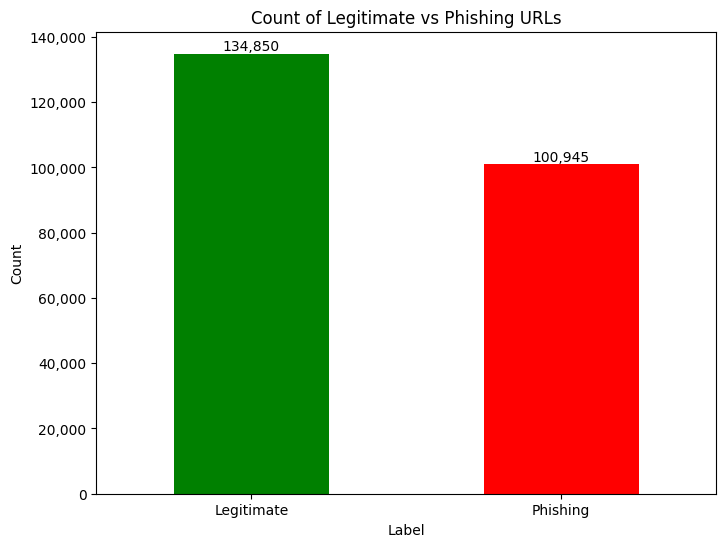

In [76]:
import matplotlib.pyplot as plt

# Counting the number of legitimate and phishing URLs
url_counts = df['label'].value_counts()

# Plotting the bar graph with labels
plt.figure(figsize=(8, 6))
ax = url_counts.plot(kind='bar', color=['green', 'red'])

# Adding labels on top of the bars with commas for readability
for container in ax.containers:
    ax.bar_label(container, fmt='{:,.0f}')

# Formatting the y-axis labels with commas for readability
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

plt.title('Count of Legitimate vs Phishing URLs')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Legitimate', 'Phishing'], rotation=0)
plt.show()

In [73]:
# Filter the dataset to include only phishing URLs (assuming 'label' = 1 indicates phishing)
legitimate_urls = df[df['label'] == 1]

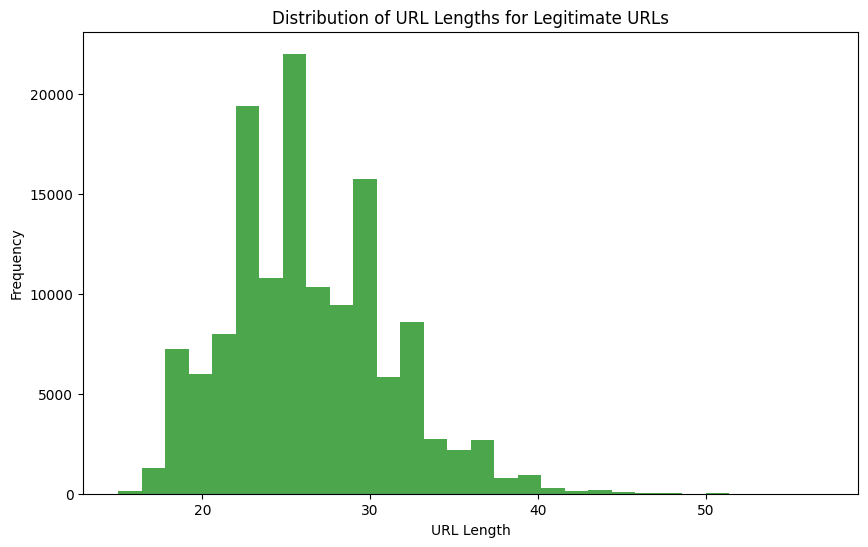

In [79]:
# If you want to visualize the distribution of these lengths:
plt.figure(figsize=(10, 6))
plt.hist(legitimate_urls['URLLength'], bins=30, color='green', alpha=0.7)
plt.title('Distribution of URL Lengths for Legitimate URLs')
plt.xlabel('URL Length')
plt.ylabel('Frequency')
plt.show()

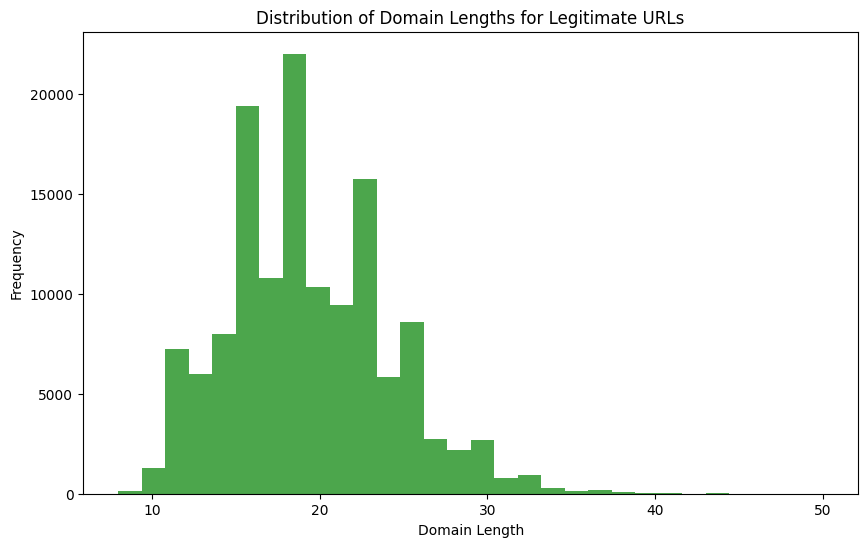

In [78]:
plt.figure(figsize=(10, 6))
plt.hist(legitimate_urls['DomainLength'], bins=30, color='green', alpha=0.7)
plt.title('Distribution of Domain Lengths for Legitimate URLs')
plt.xlabel('Domain Length')
plt.ylabel('Frequency')
plt.show()

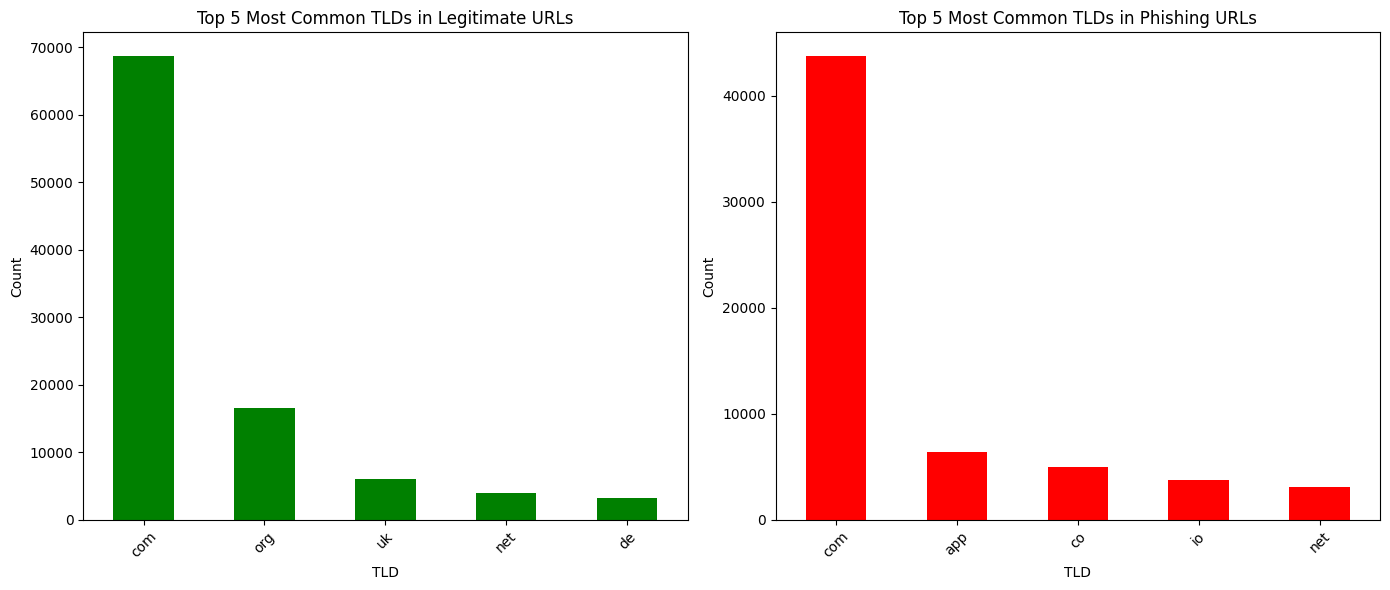

In [83]:
# Counting the most common TLDs for legitimate and phishing URLs with the correct labels
legitimate_tlds_corrected = df[df['label'] == 1]['TLD'].value_counts().head(5)
phishing_tlds_corrected = df[df['label'] == 0]['TLD'].value_counts().head(5)

# Creating a figure with subplots for better comparison
plt.figure(figsize=(14, 6))

# Plotting the most common legitimate TLDs
plt.subplot(1, 2, 1)
legitimate_tlds_corrected.plot(kind='bar', color='green')
plt.title('Top 5 Most Common TLDs in Legitimate URLs')
plt.xlabel('TLD')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Plotting the most common phishing TLDs
plt.subplot(1, 2, 2)
phishing_tlds_corrected.plot(kind='bar', color='red')
plt.title('Top 5 Most Common TLDs in Phishing URLs')
plt.xlabel('TLD')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


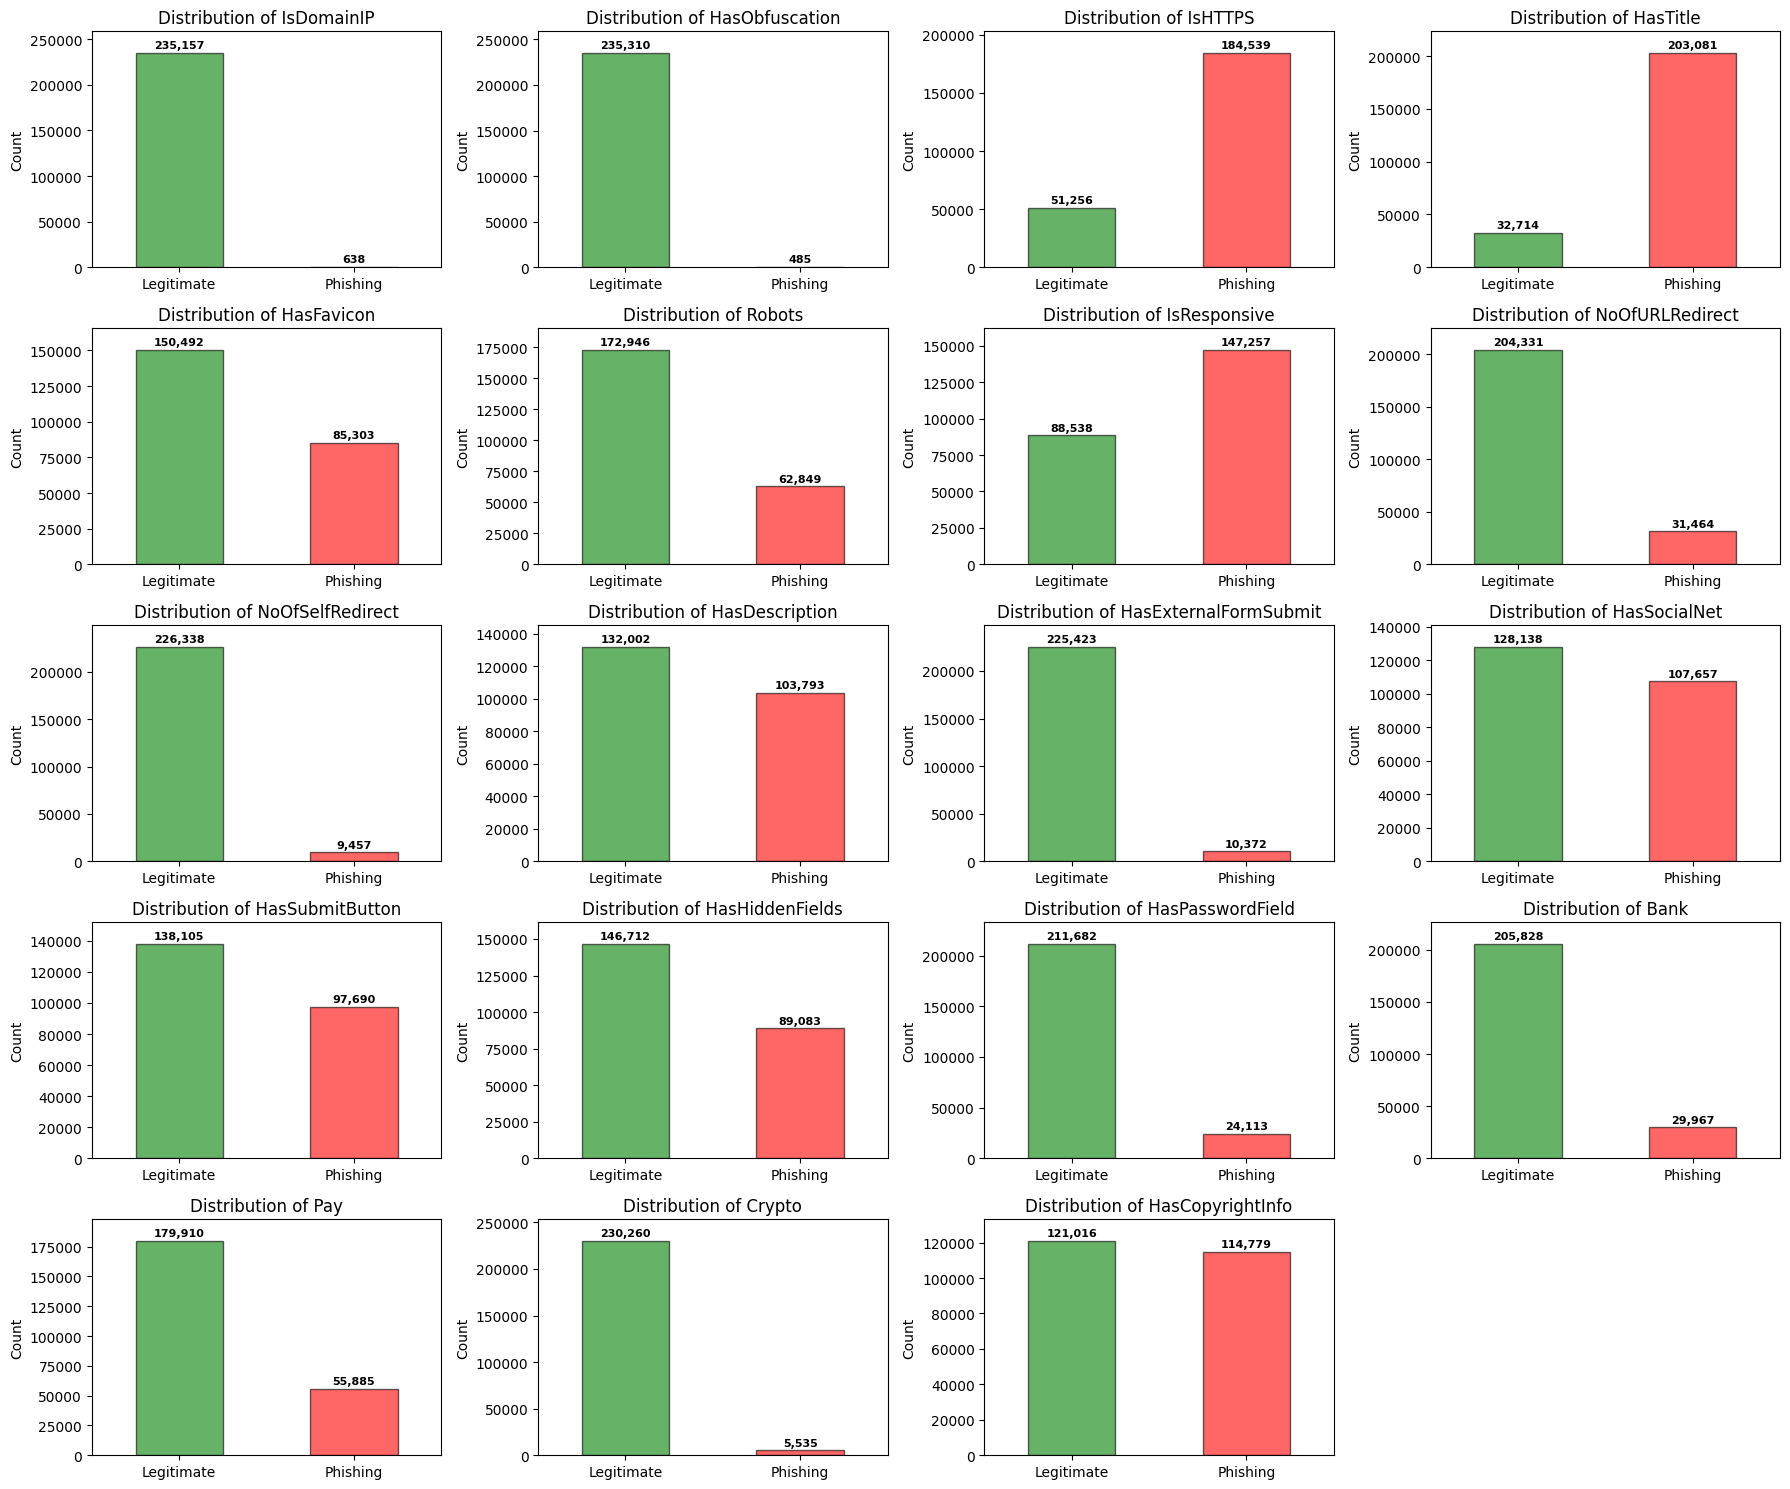

In [125]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
# df = pd.read_csv('your_dataset.csv')  # Uncomment and set your file path

# Identify binary columns (those with exactly two unique values) except 'label'
binary_columns = [col for col in df.columns if df[col].nunique() == 2 and col != 'label']

# Number of columns and rows for the subplots
n_cols = 4
n_rows = len(binary_columns) // n_cols + (len(binary_columns) % n_cols > 0)

# Create a figure with subplots, reduced height
plt.figure(figsize=(18, n_rows * 3))  # Adjust height as needed

# Plotting each binary column in the subplot
for i, column in enumerate(binary_columns, 1):
    plt.subplot(n_rows, n_cols, i)
    counts = df[column].value_counts().sort_index()  # Ensure consistent order (0,1)
    
    # Create the bar plot
    ax = counts.plot(kind='bar', color=['green', 'red'], alpha=0.6, edgecolor='black')
    
    # Set the y-axis limit to make space for labels
    ymax = counts.max() * 1.10  # 10% more than the max count
    ax.set_ylim(0, ymax)
    
    # Label the bars with comma-separated numbers above the bars
    for p in ax.patches:
        height = p.get_height()
        ax.text(
            p.get_x() + p.get_width() / 2,  # X position
            height + ymax * 0.01,           # Y position (slightly above the bar)
            f'{int(height):,}',             # Label with comma
            ha='center', va='bottom',        # Horizontal and vertical alignment
            fontsize=8,                      # Adjust font size as needed
            fontweight='bold',               # Optional: make labels bold
            color='black'                    # Optional: set label color
        )
    
    # Set titles and labels
    plt.title(f'Distribution of {column}')
    plt.ylabel('Count')
    plt.xticks(ticks=[0, 1], labels=['Legitimate', 'Phishing'], rotation=0)
    
# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


In [142]:
# Identify non-binary, non-float integer columns, excluding specific columns
excluded_columns = ['URLLength', 'DomainLength', 'TLDLength']
non_binary_int_columns = [col for col in df.columns if df[col].dtype == 'int64' and df[col].nunique() > 2 and col not in excluded_columns]

non_binary_int_columns

['NoOfSubDomain',
 'NoOfObfuscatedChar',
 'NoOfLettersInURL',
 'NoOfDegitsInURL',
 'NoOfEqualsInURL',
 'NoOfQMarkInURL',
 'NoOfAmpersandInURL',
 'NoOfOtherSpecialCharsInURL',
 'LineOfCode',
 'LargestLineLength',
 'NoOfPopup',
 'NoOfiFrame',
 'NoOfImage',
 'NoOfCSS',
 'NoOfJS',
 'NoOfSelfRef',
 'NoOfEmptyRef',
 'NoOfExternalRef']

KeyboardInterrupt: 

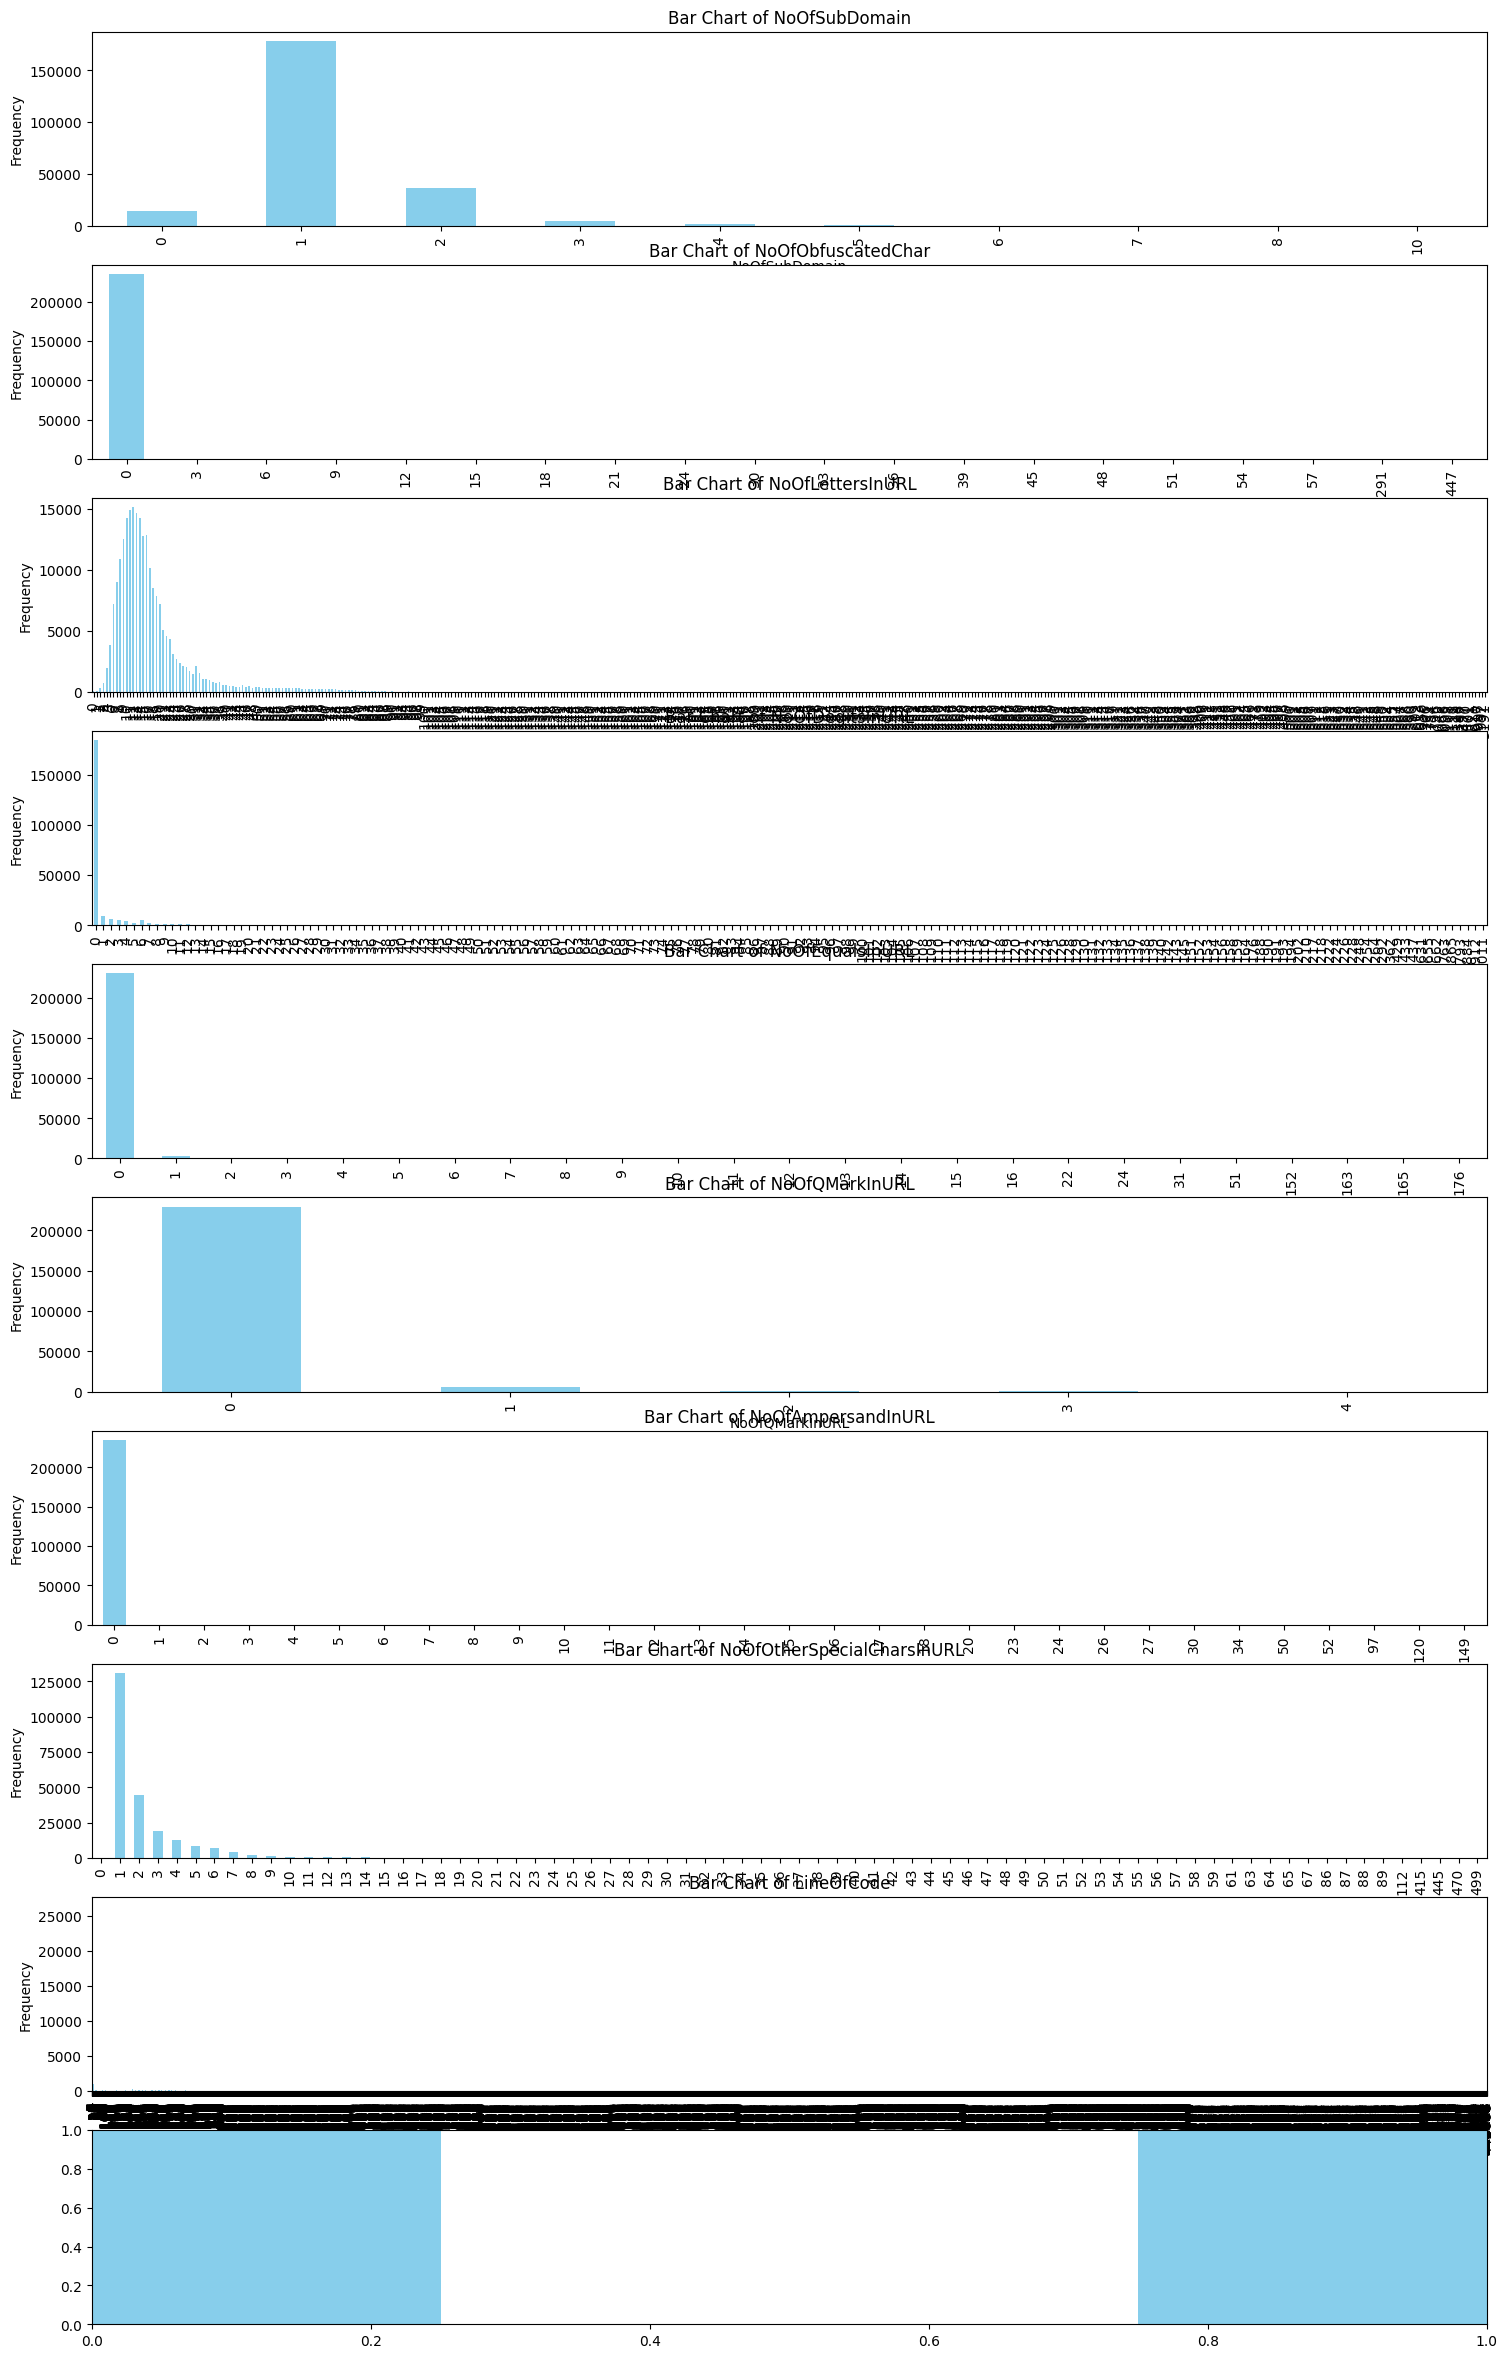

In [141]:
# Create a figure with subplots
plt.figure(figsize=(18, len(non_binary_int_columns) * 3))

# Plotting bar charts for each non-binary integer column
for i, column in enumerate(non_binary_int_columns, 1):
    plt.subplot(len(non_binary_int_columns), 1, i)
    df[column].value_counts().sort_index().plot(kind='bar', color='skyblue')
    plt.title(f'Bar Chart of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


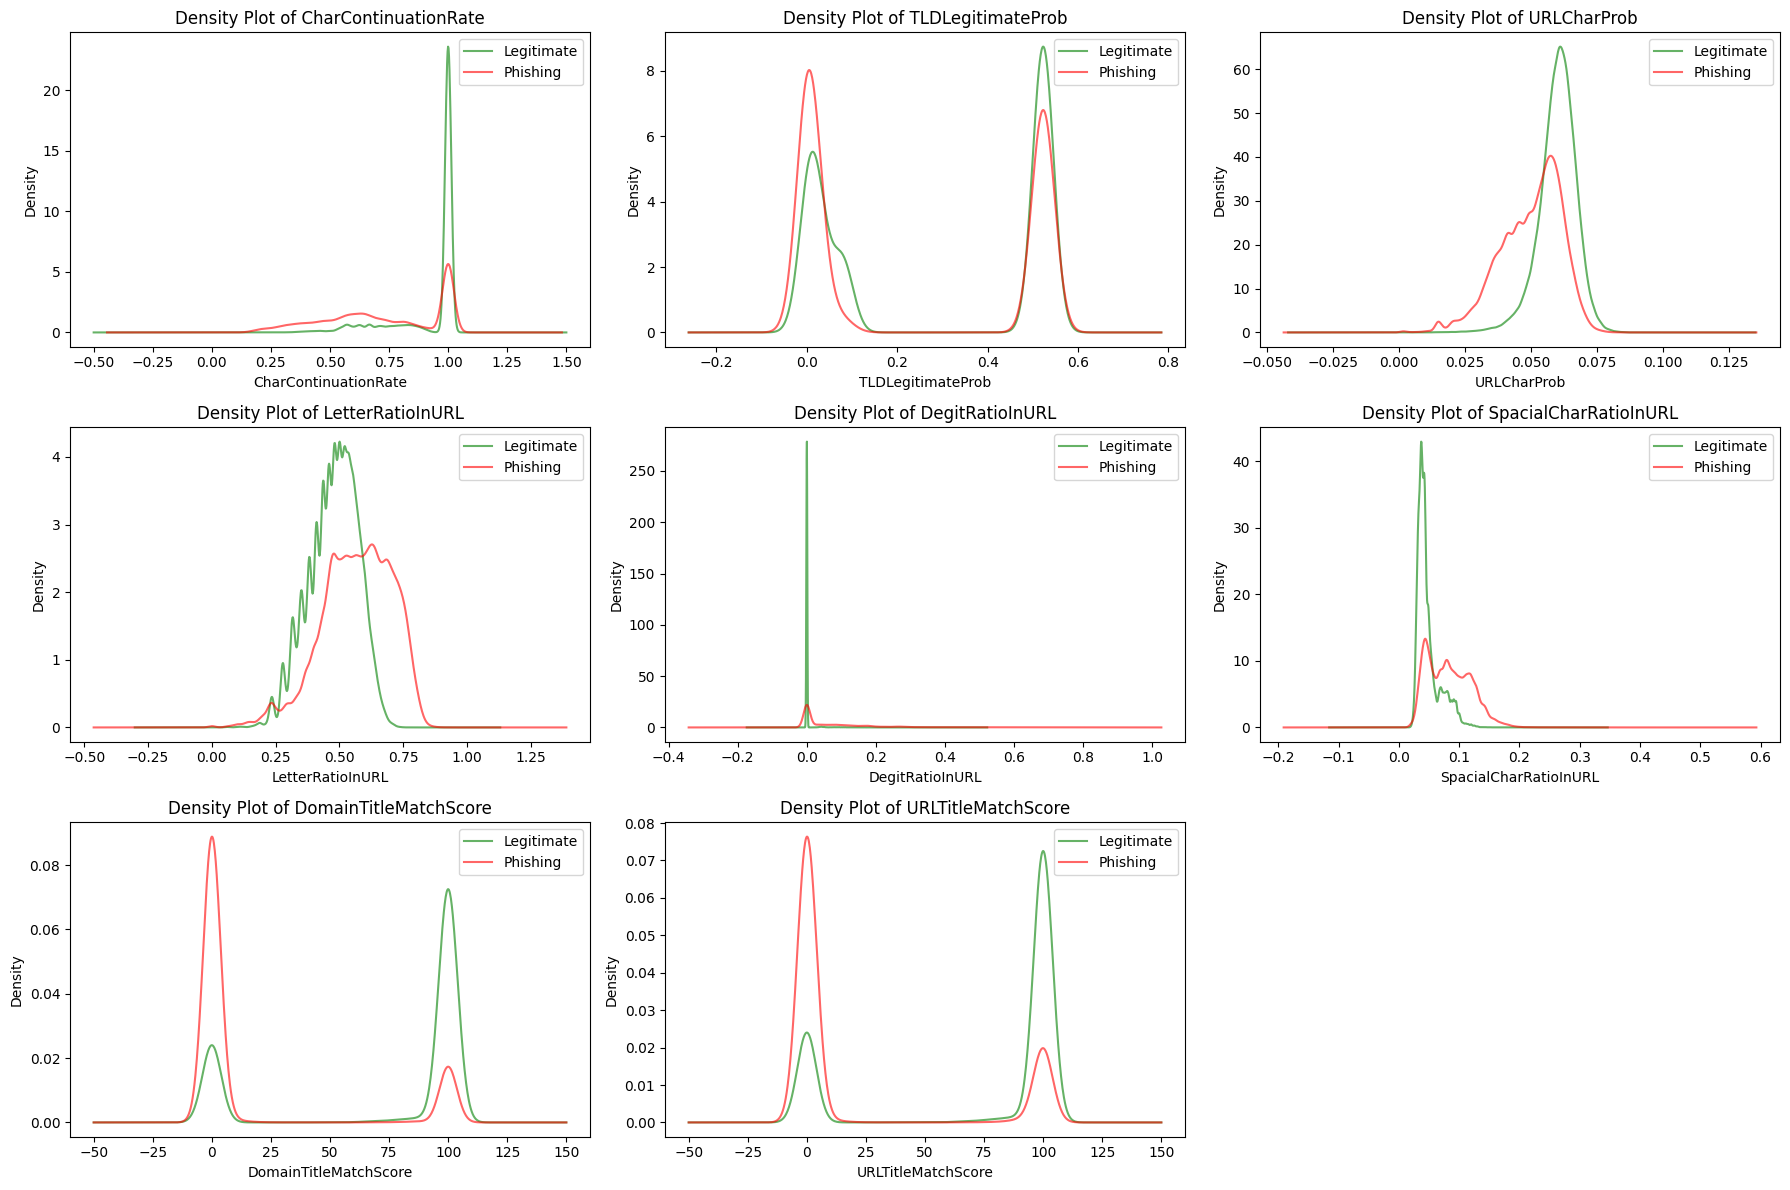

In [140]:
import matplotlib.pyplot as plt

# List of columns to include in the density plot
columns_to_plot = [
    'CharContinuationRate', 'TLDLegitimateProb', 'URLCharProb',
    'LetterRatioInURL', 'DegitRatioInURL', 'SpacialCharRatioInURL',
    'DomainTitleMatchScore', 'URLTitleMatchScore'
]

# Number of columns and rows for the subplots
n_cols = 3
n_rows = len(columns_to_plot) // n_cols + (len(columns_to_plot) % n_cols > 0)

# Create a figure with subplots
plt.figure(figsize=(18, 12))

# Plotting each density plot in the subplot
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(n_rows, n_cols, i)
    df[df['label'] == 1][column].plot(kind='density', label='Legitimate', color='green', alpha=0.6)
    df[df['label'] == 0][column].plot(kind='density', label='Phishing', color='red', alpha=0.6)
    plt.title(f'Density Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.legend()

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()